In [1]:
import compnal
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from statistics import stdev, variance, median
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

In [2]:
degree = 3
J = -1.0
#h = -0.01
N_list = [14]
T_list = np.arange(2.2, 2.31, 0.1)

In [3]:
bind = []
for N in N_list:
    temp_bind = []
    for t in tqdm(T_list):
        lattice = compnal.lattice.Square(
            x_size=N,
            y_size=N,
            boundary_condition=compnal.lattice.BoundaryCondition.PBC
        )
        model = compnal.model.PolynomialIsing(
            lattice=lattice, interaction={degree: J}
        )
        solver = compnal.solver.ClassicalMonteCarlo(
            model=model, 
        )
        solver.num_sweeps = 10000
        solver.num_samples = 1000
        solver.num_threads = 8
        solver.temperature = t
        solver.run()
        mm = solver.calculate_moment(2)
        mmmm = solver.calculate_moment(4)
        #temp_bind.append(calc_binder(solver.get_samples()))
        temp_bind.append(1 - mmmm/(3*mm*mm))
    bind.append(temp_bind)


100%|██████████| 2/2 [00:12<00:00,  6.49s/it]


<Figure size 640x480 with 0 Axes>

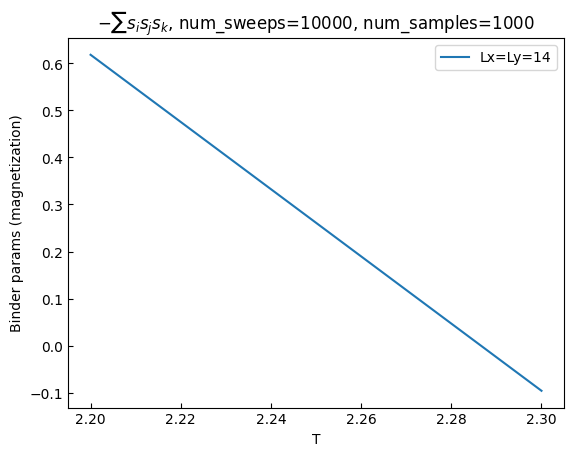

<Figure size 640x480 with 0 Axes>

In [4]:
for i, N in enumerate(N_list):
    plt.plot(T_list, bind[i], label=f"Lx=Ly={N}")
    plt.xlabel("T")
    plt.ylabel("Binder params (magnetization)")
    plt.title(f"$-\sum s_is_js_k$, num_sweeps={solver.num_sweeps}, num_samples={solver.num_samples}")
plt.legend()
plt.figure()

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 